<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/EDA_RedWineData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/piyushgoyal443/red-wine-dataset/code



#ABOUT DATASET
1. Dataset for Red wine Quality samples
2. 11 Input features and one output feature
  1 - **fixed acidity (tartaric acid - g / dm^3)**
      most acids involved with wine are fixed or nonvolatile

  2 - **volatile acidity (acetic acid - g / dm^3)**
      The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

  3 - **citric acid (g / dm^3)**
      found in small quantities, citric acid can add 'freshness' and flavor to wines

  4 - **residual sugar (g / dm^3)**
       the amount of sugar remaining after fermentation stops,
       it's rare to find wines with less than 1 gram/liter
       and wines with greater than 45 grams/liter are considered sweet.

  5 - **chlorides (sodium chloride - g / dm^3)**
       the amount of salt in the wine

  6 - **free sulfur dioxide (mg / dm^3)**
      free sulfur dioxide: the free form of SO2 exists
      in equilibrium between molecular SO2 (as a dissolved gas)
       and bisulfite ion; it prevents microbial growth and
       the oxidation of wine.

  7 - **total sulfur dioxide (mg / dm^3)**
      total sulfur dioxide: amount of free and bound forms of S02;
      in low concentrations, SO2 is mostly undetectable in wine,
      but at free SO2 concentrations over 50 ppm, SO2 becomes evident
      in the nose and taste of wine

  8 - **density (g / cm^3)**
      density: the density of water is close to that of water depending
      on the percent alcohol and sugar content

  9 - **pH**
      describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

  10 - **sulphates (potassium sulphate - g / dm3)**
        a wine additive which can contribute to sulfur dioxide gas
        (S02) levels, wich acts as an antimicrobial and antioxidant

  11 - **alcohol (% by volume)**
       the percent alcohol content of the wine
       

  Output variable (based on sensory data):
  12 - **quality (score between 0 and 10)**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the CSV into dataframe
df=pd.read_csv("/content/wineQualityReds.csv")

In [3]:
#See if csv is loaded into Dataframe (Validation)

df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Get the dataset information like column names, their type, count of datapoints
#in each column, null or non-null etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


As per above info output, we got Column names and datatype of all of them.
all column are numeric.
Total 1599 rows.
There are no null values.



In [6]:
#Here we see first column is not named correctly. Lets Rename it with SrNo

df.rename(columns={'Unnamed: 0':'SrNo'},inplace=True)

#if you dont use inplace=True, new name will not be saved in df

df.columns

Index(['SrNo', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [7]:
#Find total number of rows and columns
df.shape

(1599, 13)

In [9]:
#Total datapoints
df.size

20787

In [11]:
#Find descriptive summary
# Count, Mean std, min max, 25 50 (median) 75 percentile values for each column
df.describe()

,SrNo,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
df.dtypes

SrNo                      int64
fixed.acidity           float64
volatile.acidity        float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
free.sulfur.dioxide     float64
total.sulfur.dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [15]:
#only mean value for each columns
df.mean()

SrNo                    800.000000
fixed.acidity             8.319637
volatile.acidity          0.527821
citric.acid               0.270976
residual.sugar            2.538806
chlorides                 0.087467
free.sulfur.dioxide      15.874922
total.sulfur.dioxide     46.467792
density                   0.996747
pH                        3.311113
sulphates                 0.658149
alcohol                  10.422983
quality                   5.636023
dtype: float64

In [16]:
#mean value for specific column
df['pH'].mean()

3.3111131957473416

In [22]:
# datapoints from specific rows and column
df.iloc[-5:, -1:]      # last 5 rows of last column

,quality
1594,5
1595,6
1596,6
1597,5
1598,6


In [60]:
#How many type of unique datapoints in output column
df['quality'].unique()
# So total 6 categories 3,4,5,6,7,8

array([5, 6, 7, 4, 8, 3])

In [28]:
#Total number of datapoints  each category
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
# As you see above, datapoints are not equally distributed so its imblanced
#dataset. We may need to upsample so as to have balanced dataset for ML

In [31]:
# See if any col has missing values
df.isnull().sum()

# 0 mean column has 0 null values.

SrNo                    0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
# Check for duplicate values/ rows

df.duplicated().sum()
# 0 duplicated rows

0

In [34]:
# if there are any duplicate rows
# find them as
df[df.duplicated()]

,SrNo,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality


In [40]:
# and then drop duplicate rows
df.drop_duplicates(inplace=True)
df.shape
#Just to confirm rows are dropped.

(1599, 13)

In [41]:
#Lets find how each column is correlated with each other
df.corr()

# positive value =directly proportional
#-ve values = inversly proportional
#values close to 1 strong +ve proportion


,SrNo,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
SrNo,1.000000,-0.268484,-0.008815,-0.153551,-0.031261,-0.119869,0.090480,-0.117850,-0.368372,0.136005,-0.125307,0.245123,0.066453
fixed.acidity,-0.268484,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.008815,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,-0.153551,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,-0.031261,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,-0.119869,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,0.090480,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.117850,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,-0.368372,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,0.136005,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731


<Axes: >

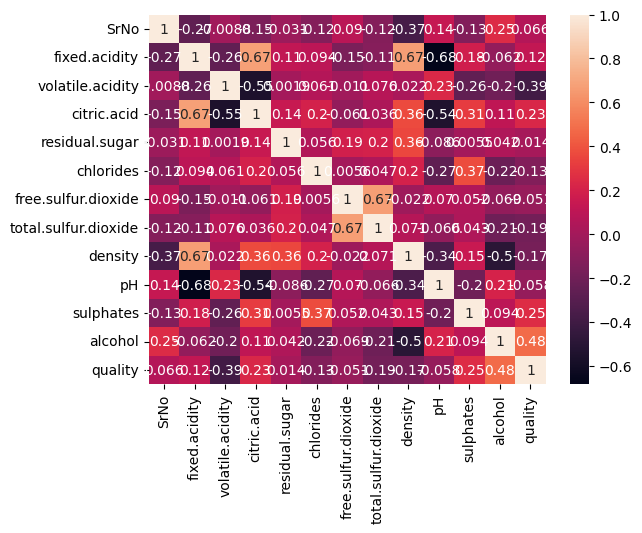

In [56]:
#Lets plot them for better view.
sns.heatmap(df.corr(), annot=True)

#ligheter coloured boxes are strong correlated column

<Axes: >

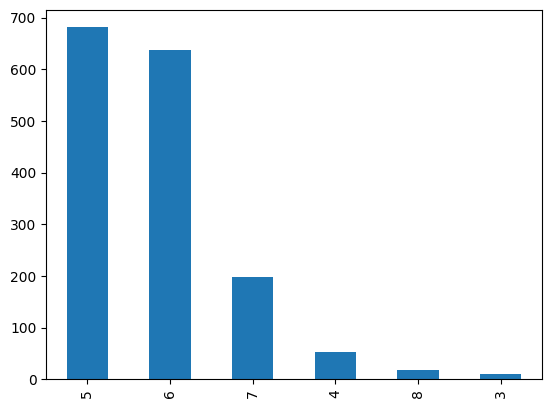

In [58]:
#Find output columns in bar graph
df['quality'].value_counts().plot(kind='bar')

<Axes: ylabel='pH'>

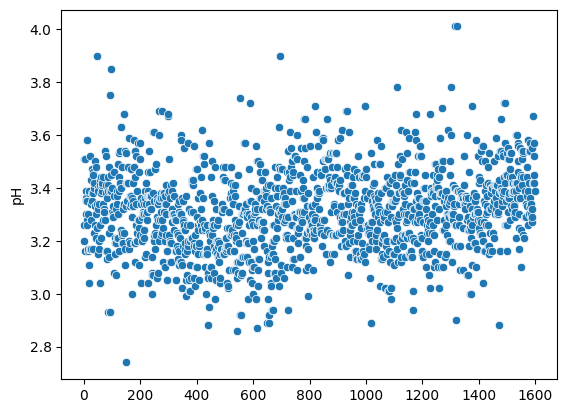

In [71]:
sns.scatterplot( df['pH'])

<Axes: >

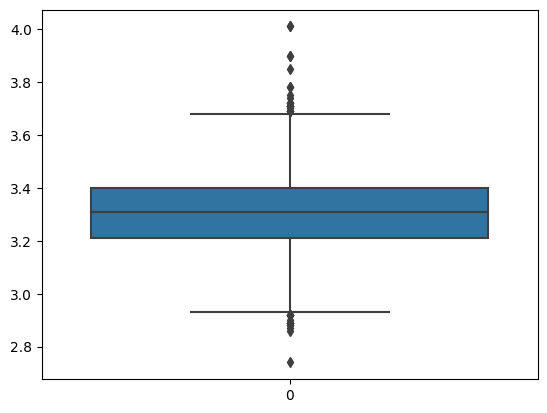

In [72]:
sns.boxplot(df['pH'])